# Regression

## Data creation

In [48]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

In [50]:
m = 100
X = 2 * torch.rand(m, 1)            # 0~2 사이
y = 4 + 3 * X + torch.randn(m, 1)   # y=3X+4  + 노이즈

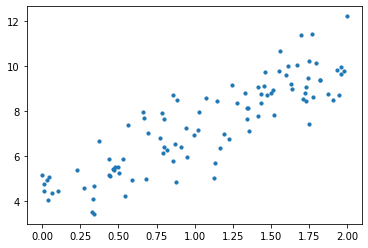

In [52]:
plt.scatter(X, y, s=10)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

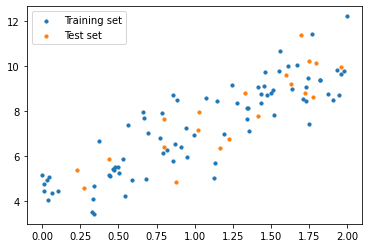

In [54]:
plt.scatter(X_train, y_train, s=10)
plt.scatter(X_test, y_test, s=10)
plt.legend(['Training set', 'Test set'])

## Regression model

In [6]:
X_train_3 = X_train[:3]
y_train_3 = y_train[:3]

In [55]:
X_train_3, y_train_3

(tensor([[0.7088],
         [1.9920],
         [0.0386]]), tensor([[6.6011],
         [9.7973],
         [3.0472]]))

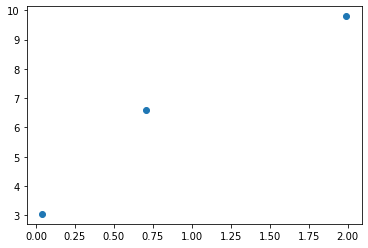

In [56]:
plt.scatter(X_train_3, y_train_3)

### Hypothesis  
H(x) = Wx+b

In [57]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
hypothesis = X_train_3 * W + b

In [58]:
hypothesis

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)

### Compute loss

cost(W, b) = mean((H(x) - y)^2)

In [59]:
cost = torch.mean((hypothesis - y_train_3) ** 2)

In [60]:
cost

tensor(49.6152, grad_fn=<MeanBackward0>)

### Gradient descent

#### 미분으로 계산

In [61]:
y_train_3

tensor([[6.6011],
        [9.7973],
        [3.0472]])

In [62]:
## dC/dW
sum((2/3) * ((W * X_train_3 + b) - y_train_3) * X_train_3)

tensor([-16.2085], grad_fn=<AddBackward0>)

In [63]:
## dC/db
sum((2/3) * ((W * X_train_3 + b) - y_train_3))

tensor([-12.9637], grad_fn=<AddBackward0>)

#### torch.optim 라이브러리 활용

In [64]:
import torch.optim as optim

Optimizer 설정 - Stochastic gradient descent 를 활용하여 W와 b를 최적화.  
learning rate=0.01

In [65]:
optimizer = optim.SGD([W, b], lr=0.01)

최적화 과정 - 3가지가 항상 붙어다님. 

In [66]:
hypothesis = X_train_3 * W + b
cost = torch.mean((hypothesis - y_train_3) ** 2)

In [67]:
optimizer.zero_grad() # 모든 gradient를 0으로 초기화
cost.backward(retain_graph=True) # gradient 계산하여 (parameters).grad를 저장
optimizer.step() # step으로 parameter를 개선

gradient 확인

In [68]:
W.grad, b.grad

(tensor([-16.2085]), tensor([-12.9637]))

In [69]:
print(W, b)

tensor([0.1621], requires_grad=True) tensor([0.1296], requires_grad=True)


#### 1 step이후 확인

In [91]:
hypothesis = X_train_3 * W + b
hypothesis

tensor([[ 6.2462],
        [10.0482],
        [ 4.2606]], grad_fn=<AddBackward0>)

In [92]:
hypothesis.detach()

tensor([[ 6.2462],
        [10.0482],
        [ 4.2606]])

In [93]:
hypothesis.detach().numpy()

array([[ 6.2461963],
       [10.048199 ],
       [ 4.2606387]], dtype=float32)

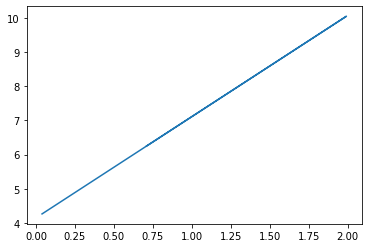

In [94]:
plt.plot(X_train_3, hypothesis.detach())

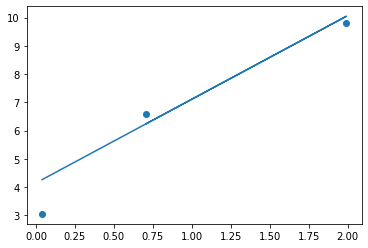

In [95]:
plt.scatter(X_train_3, y_train_3)
plt.plot(X_train_3, hypothesis.detach().numpy())

# required_grad = True 로 되어 있는 변수는 다른 일을 못합.
# .detach():  hypothesis 는  required_grad = True 이므로 그것을 때어냄
# 그 후 넘파이로 변환은 옛날 파이토치에서는 필요했으나, 지금은 안붙여도 됨

### Training with Full code

In [96]:
# Data setup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model initialize
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Set optimizer
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # Calculate H(X)
    hypothesis = X_train * W + b
#     hypothesis = X_train_3 * W + b
    
    # Calculate cost
    cost = torch.mean((hypothesis - y_train) ** 2)
#     cost = torch.mean((hypothesis - y_train_3) ** 2)
    
    # Parameter gradient descent
    optimizer.zero_grad()
    cost.backward() 
    optimizer.step() 
    
    if epoch % 20 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

        # W.item() 에 담겨 있는 값을 출력해줌

Epoch    0/1000 W: 0.176, b: 0.146 Cost: 57.526409
Epoch   20/1000 W: 2.375, b: 2.009 Cost: 9.589406
Epoch   40/1000 W: 3.197, b: 2.760 Cost: 2.441650
Epoch   60/1000 W: 3.488, b: 3.081 Cost: 1.359910
Epoch   80/1000 W: 3.577, b: 3.234 Cost: 1.182039
Epoch  100/1000 W: 3.589, b: 3.321 Cost: 1.140411
Epoch  120/1000 W: 3.573, b: 3.381 Cost: 1.120706
Epoch  140/1000 W: 3.547, b: 3.429 Cost: 1.105745
Epoch  160/1000 W: 3.518, b: 3.470 Cost: 1.092811
Epoch  180/1000 W: 3.489, b: 3.508 Cost: 1.081356
Epoch  200/1000 W: 3.461, b: 3.544 Cost: 1.071169
Epoch  220/1000 W: 3.435, b: 3.577 Cost: 1.062102
Epoch  240/1000 W: 3.410, b: 3.608 Cost: 1.054032
Epoch  260/1000 W: 3.386, b: 3.638 Cost: 1.046849
Epoch  280/1000 W: 3.364, b: 3.666 Cost: 1.040456
Epoch  300/1000 W: 3.343, b: 3.692 Cost: 1.034765
Epoch  320/1000 W: 3.323, b: 3.717 Cost: 1.029699
Epoch  340/1000 W: 3.304, b: 3.740 Cost: 1.025191
Epoch  360/1000 W: 3.286, b: 3.762 Cost: 1.021177
Epoch  380/1000 W: 3.270, b: 3.783 Cost: 1.017605

In [97]:
W, W.item()

(tensor([3.0370], requires_grad=True), 3.0370383262634277)

In [98]:
hx = (X_train * W + b).detach().numpy()

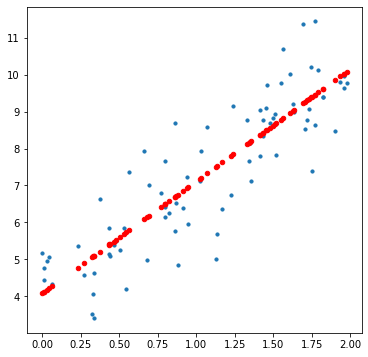

In [99]:
plt.figure(figsize=[6, 6])
plt.scatter(X_train, y_train, s=10)
plt.scatter(X_train, hx, s=20, c='r')

## High level implementation with nn.Module

`nn.module`을 활용하여 모델 구축  
`nn.module`: 신경망 모듈. 각종 레이어(linear, conv, ...)를 지원하며 output을 return하는 forward(input) 메서드를 포함함

In [100]:
from torch import nn as nn
from torch.nn import functional as F

nn.Linear 레이어의 활용

In [101]:
class my_LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [102]:
model = my_LinearRegression()

In [103]:
model

my_LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [104]:
hypothesis = model(X_train[:3])

In [105]:
hypothesis

tensor([[0.7409],
        [1.1129],
        [1.1012]], grad_fn=<AddmmBackward>)

In [106]:
hypothesis = model(X_train)
cost = F.mse_loss(hypothesis, y_train)

In [107]:
cost

tensor(49.1417, grad_fn=<MseLossBackward>)

In [108]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [109]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

### Training with Full code

In [110]:
# Data setup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model initialize
model = my_LinearRegression()

# Set optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # Calculate H(X)
    hypothesis = model(X_train)
    
    # Calculate cost
    cost = F.mse_loss(hypothesis, y_train)
    
    # Parameter gradient descent
    optimizer.zero_grad()
    cost.backward() 
    optimizer.step() 
    
    if epoch % 20 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: 0.073, b: 0.054 Cost: 63.087440
Epoch   20/1000 W: 2.415, b: 1.976 Cost: 9.654207
Epoch   40/1000 W: 3.256, b: 2.729 Cost: 2.253997
Epoch   60/1000 W: 3.540, b: 3.045 Cost: 1.208543
Epoch   80/1000 W: 3.619, b: 3.196 Cost: 1.042688
Epoch  100/1000 W: 3.623, b: 3.285 Cost: 1.000659
Epoch  120/1000 W: 3.601, b: 3.348 Cost: 0.977893
Epoch  140/1000 W: 3.571, b: 3.400 Cost: 0.959715
Epoch  160/1000 W: 3.539, b: 3.446 Cost: 0.943881
Epoch  180/1000 W: 3.508, b: 3.488 Cost: 0.929886
Epoch  200/1000 W: 3.478, b: 3.528 Cost: 0.917489
Epoch  220/1000 W: 3.449, b: 3.565 Cost: 0.906502
Epoch  240/1000 W: 3.422, b: 3.600 Cost: 0.896766
Epoch  260/1000 W: 3.397, b: 3.632 Cost: 0.888137
Epoch  280/1000 W: 3.373, b: 3.663 Cost: 0.880490
Epoch  300/1000 W: 3.350, b: 3.692 Cost: 0.873713
Epoch  320/1000 W: 3.329, b: 3.720 Cost: 0.867707
Epoch  340/1000 W: 3.309, b: 3.745 Cost: 0.862384
Epoch  360/1000 W: 3.291, b: 3.770 Cost: 0.857667
Epoch  380/1000 W: 3.273, b: 3.792 Cost: 0.853486

### 결과 확인

In [111]:
hx = (model(X_train)).detach().numpy()

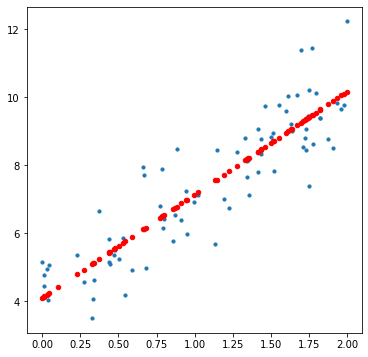

In [112]:
plt.figure(figsize=[6, 6])
plt.scatter(X_train, y_train, s=10)
plt.scatter(X_train, hx, s=20, c='r')

## Multivariate Linear Regression

In [113]:
m = 100
x1 = torch.rand(m, 1)
x2 = 2 * torch.rand(m, 1)
x3 = 3 * torch.rand(m, 1)
X = torch.cat((x1, x2, x3), axis=1)
y = 4 + 3 * x1 + 2 * x2 + 5 * x3 + torch.randn(m, 1)

In [114]:
X.shape, y.shape

(torch.Size([100, 3]), torch.Size([100, 1]))

In [115]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = MultivariateLinearRegressionModel()

# Set optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 5000
for epoch in range(nb_epochs + 1):
    # Calculate H(X)
    hypothesis = model(X_train)
    
    # Calculate cost
    cost = F.mse_loss(hypothesis, y_train)
    
    # Parameter gradient descent
    optimizer.zero_grad()
    cost.backward() 
    optimizer.step() 
    
    if epoch % 500 == 0:
        params = list(model.parameters())
       
        print('Epoch {:4d}/{} {} Cost: {:.6f}'.format(
            epoch, nb_epochs, list(model.parameters()), cost.item()
        ))

Epoch    0/5000 [Parameter containing:
tensor([[0.4777, 0.5409, 0.4744]], requires_grad=True), Parameter containing:
tensor([0.2682], requires_grad=True)] Cost: 232.490799
Epoch  500/5000 [Parameter containing:
tensor([[2.5252, 2.4347, 5.2049]], requires_grad=True), Parameter containing:
tensor([3.5273], requires_grad=True)] Cost: 0.699627
Epoch 1000/5000 [Parameter containing:
tensor([[2.6139, 2.3241, 5.1654]], requires_grad=True), Parameter containing:
tensor([3.6778], requires_grad=True)] Cost: 0.688436
Epoch 1500/5000 [Parameter containing:
tensor([[2.6034, 2.3009, 5.1559]], requires_grad=True), Parameter containing:
tensor([3.7253], requires_grad=True)] Cost: 0.687778
Epoch 2000/5000 [Parameter containing:
tensor([[2.5872, 2.2928, 5.1525]], requires_grad=True), Parameter containing:
tensor([3.7479], requires_grad=True)] Cost: 0.687604
Epoch 2500/5000 [Parameter containing:
tensor([[2.5757, 2.2887, 5.1507]], requires_grad=True), Parameter containing:
tensor([3.7610], requires_grad=

### 결과 확인

In [125]:
from sklearn.decomposition import PCA

## PCA 는 창원 축소를 용도로 사용되는 라이브러리
## 다차원을 그래프로 표현하기는 어렵다.

In [121]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_train)

In [122]:
hx = model(X_train).detach().numpy()

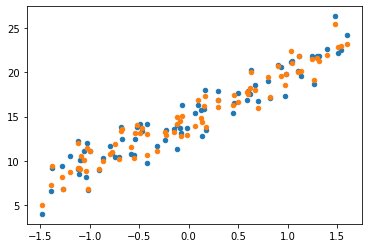

In [123]:
plt.scatter(X_pca, y_train, s=20)
plt.scatter(X_pca, hx, s=20)